# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# Carregando libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregando base de dados
renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
# separando apenas os dados numericos
renda_num = renda[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 
                   'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda']]
renda_num

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,False,True,1,36,3.575342,3.0,False,3369.24
1,True,True,0,42,0.860274,2.0,False,6096.14
2,True,True,2,31,8.065753,4.0,False,5658.98
3,True,False,0,50,1.208219,2.0,False,7246.69
4,False,False,0,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...
14995,True,True,1,37,2.046575,3.0,False,1193.29
14996,True,True,1,30,12.079452,3.0,False,2519.18
14997,True,True,0,40,2.161644,2.0,False,1586.85
14998,False,True,0,47,3.295890,2.0,False,6975.39


In [5]:
# matriz de correlação
renda_num.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


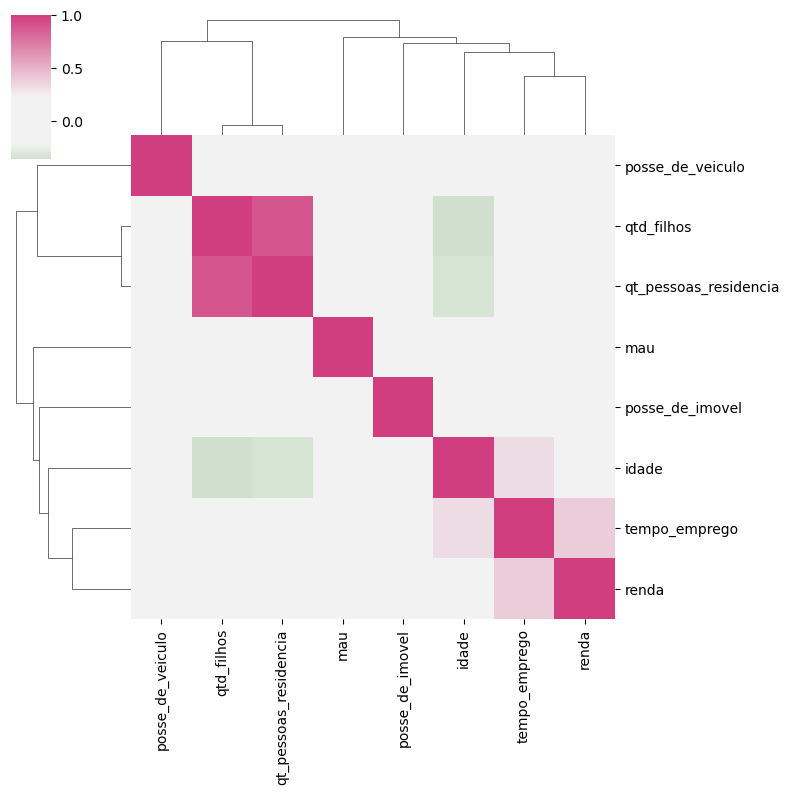

In [6]:
cmap = sns.diverging_palette(h_neg = 124, h_pos=350, as_cmap = True, sep = 60, center='light')
sns.clustermap(renda_num.corr(), figsize = (8,8),center = 0, cmap=cmap)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


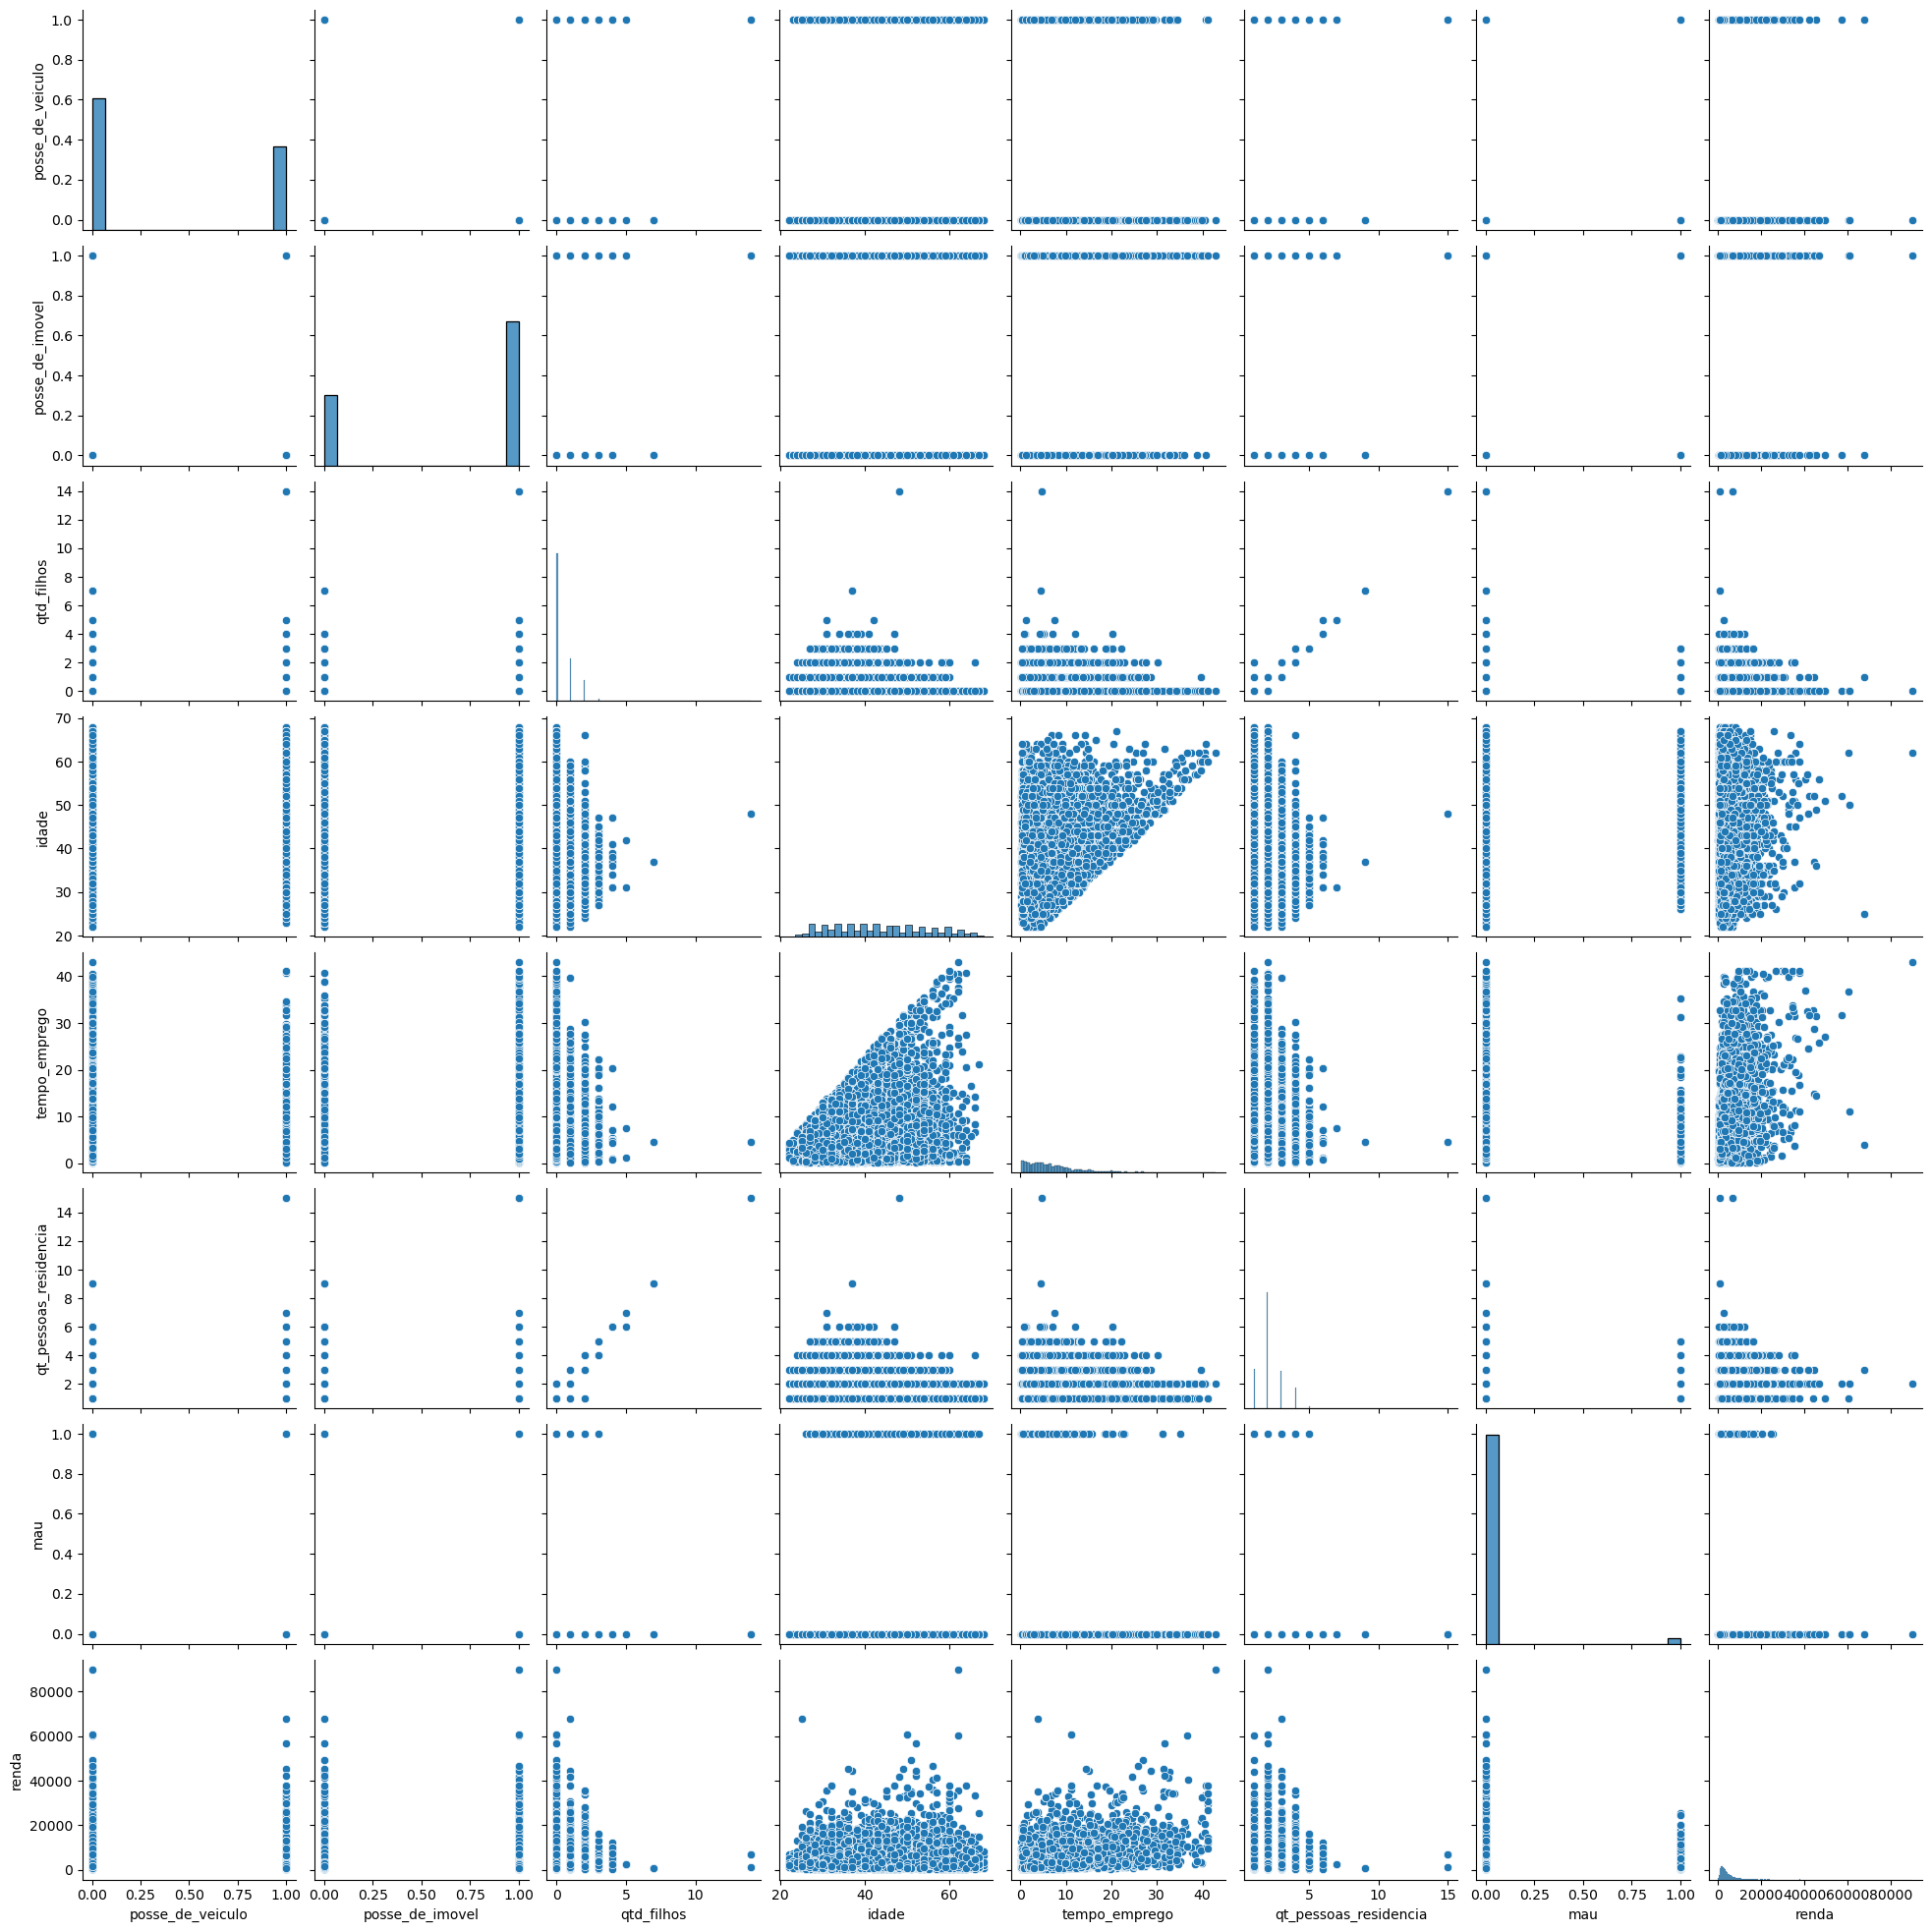

In [7]:
# matriz de dispersão

sns.pairplot(renda_num)

**Além das correlações obvias entre quantidade de filhos e quantidade de pessas na residencias, e a idade com o tempo no emprego, aparentemente tem uma correlação entre o tempo no emprego e a renda, e correlação entre a idade e a renda. 
A presensa de muitos outliers dificulta a afirmar isso com mais precisão.**

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='idade', ylabel='renda'>

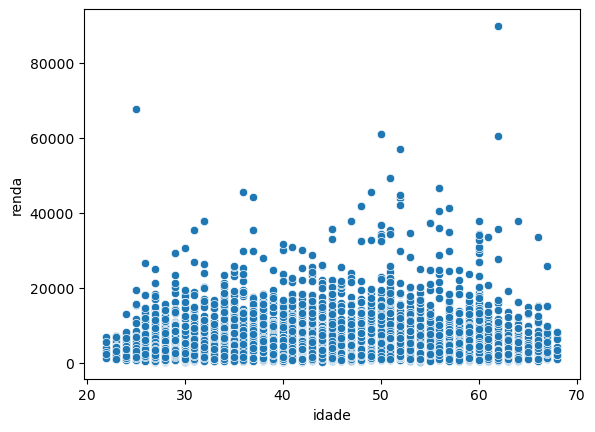

In [8]:
# Visualizando a dispersão da variavel renda em relação a idade
sns.scatterplot(data=renda_num, y='renda', x='idade')

<Axes: xlabel='tempo_emprego', ylabel='renda'>

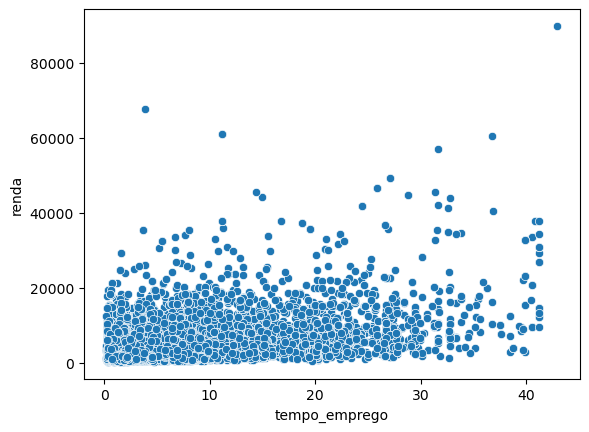

In [9]:
# Visualizando a dispersão da variavel renda em relação ao tempo de emprego
sns.scatterplot(data=renda_num, y='renda', x='tempo_emprego')

3) Na su aopinião, há outliers na variável renda?

**Temos sim alguns outliers na variável renda, tando em relação ao tempo de emprego, quando em relação a idade**

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [10]:
# Calculando log
renda_log = renda_num.copy()
renda_log['renda_log'] = np.log(renda_log['renda'])
renda_log

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,renda_log
0,False,True,1,36,3.575342,3.0,False,3369.24,8.122442
1,True,True,0,42,0.860274,2.0,False,6096.14,8.715411
2,True,True,2,31,8.065753,4.0,False,5658.98,8.640999
3,True,False,0,50,1.208219,2.0,False,7246.69,8.888300
4,False,False,0,52,13.873973,2.0,False,4017.37,8.298383
...,...,...,...,...,...,...,...,...,...
14995,True,True,1,37,2.046575,3.0,False,1193.29,7.084469
14996,True,True,1,30,12.079452,3.0,False,2519.18,7.831689
14997,True,True,0,40,2.161644,2.0,False,1586.85,7.369506
14998,False,True,0,47,3.295890,2.0,False,6975.39,8.850144


In [11]:
# nova matriz de correlação
renda_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,renda_log
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
renda_log,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


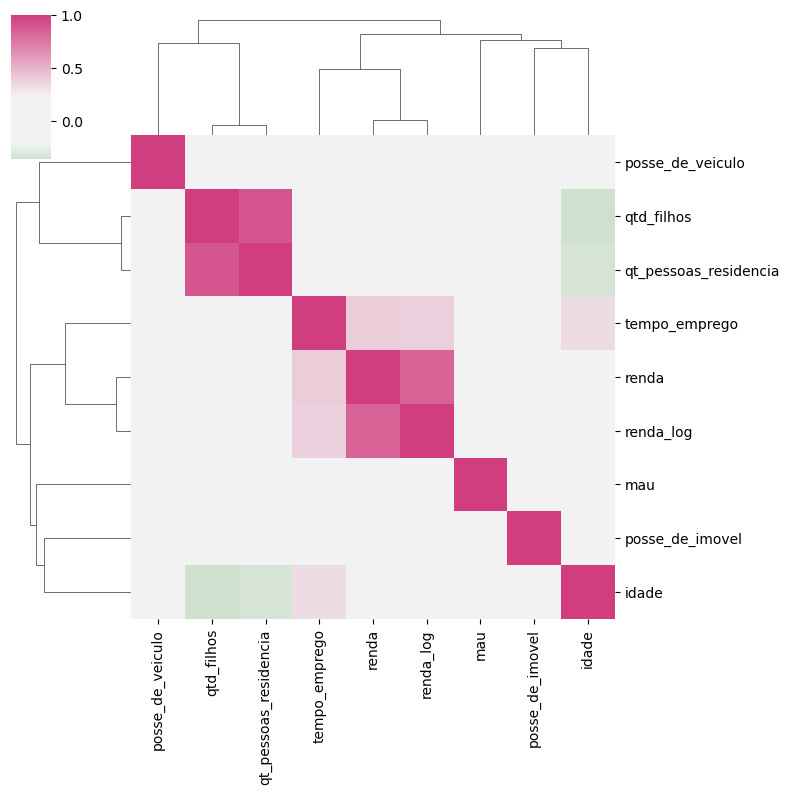

In [12]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60)
sns.clustermap(data=renda_log.corr(), figsize=(8,8), center=0, cmap=cmap)

<Axes: xlabel='idade', ylabel='renda_log'>

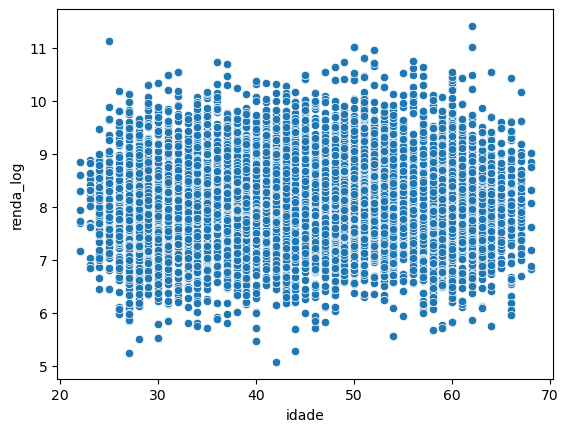

In [13]:
# nova correlação entre renda e idade
sns.scatterplot(data=renda_log, y='renda_log', x='idade')

<Axes: xlabel='tempo_emprego', ylabel='renda_log'>

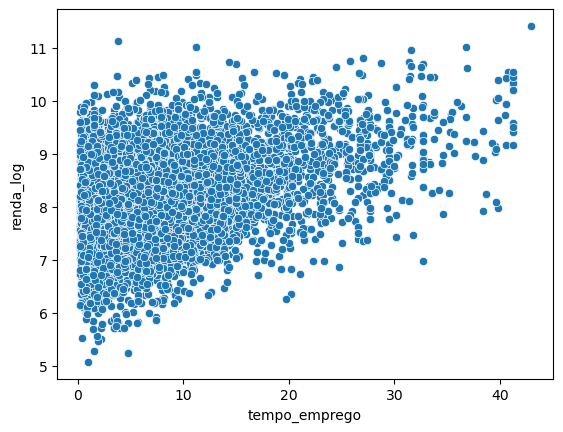

In [14]:
# nova correlação entre renda e tempo de emprego
sns.scatterplot(data=renda_log, y='renda_log', x='tempo_emprego')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

**Ajudou a identificar que entre a idade e a renda não há a correlação que parecia ter num primeiro momento, mas entre a reda e o tempo de emprego tem uma correlação bem clara**